<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histograms**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-01 12:47:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  61.2MB/s    in 3.3s    

2025-06-01 12:47:50 (60.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [9]:
QUERY = """ SELECT * FROM main """
data = pd.read_sql_query(QUERY,conn)

In [10]:
df = data.copy()

In [11]:
# DATA WRANGLING

# Add Age_Median column
age_map = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Median'] = df['Age'].map(age_map)

# Add MainBranch_Type column
mainbranch_map = {
    'I am a developer by profession': 'Professional',
    'I am learning to code': 'Learner',
    'I code primarily as a hobby': 'Hobbyist',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional',
    'I used to be a developer by profession, but no longer am': 'Former Professional'
}
df['MainBranch_Type'] = df['MainBranch'].map(mainbranch_map)

# Add TimeSearching_Median column
timesearching_map = {
    'Less than 15 minutes a day': 7,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 121
}
df['TimeSearching_Median'] = df['TimeSearching'].map(timesearching_map)
df['TimeSearching_Median'] = pd.to_numeric(df['TimeSearching_Median'], errors='coerce')

# Convert YearsCodePro to number
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year' : 17,
    'More than 50 years' : 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Add YearsCodePro_Level column
import numpy as np

def convert_experience(val):
    if val == 'None' or pd.isna(val):
        return np.nan
    if val <= 2:
        return 'Beginner (0-2)'
    elif val <= 5:
        return 'Junior (3-5)'
    elif val <= 10:
        return 'Mid (6-10)'
    elif val <= 20:
        return 'Senior (11-20)'
    else:
        return 'Veteran (21+)'

df['YearsCodePro_Level'] = df['YearsCodePro'].apply(convert_experience)

In [12]:
df['CompTotal'].describe()

count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

In [13]:
cols = ['CompTotal']
df_hist = df[cols].dropna().reset_index(drop=True)
df_hist = df_hist[df_hist['CompTotal'] < df_hist['CompTotal'].median()] # remove outlier
df_hist.head()

,CompTotal
1,28000.0
2,85000.0
3,50000.0
6,95000.0
8,35000.0


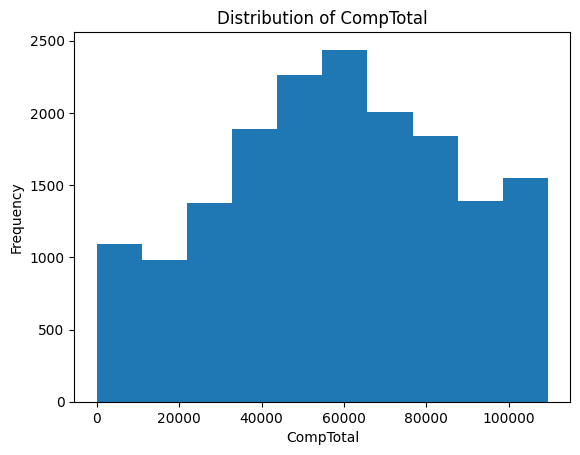

In [14]:
plt.hist(df_hist, bins = 10)
plt.title('Distribution of CompTotal')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [15]:
df['YearsCodePro'].unique()

array([nan, 17., 27.,  7., 11., 25., 12., 10.,  3., 18., 37., 15., 20.,
        6.,  2., 16.,  8., 14.,  4., 45.,  1., 24., 29.,  5., 30., 26.,
        9., 33., 13., 35., 23., 22., 31., 19., 21., 28., 34., 32., 40.,
       50., 39., 44., 42., 41., 36., 38., 51., 43., 47., 48., 46., 49.])

In [16]:
cols = ['YearsCodePro']
df_hist = df[cols].dropna().reset_index(drop=True)
df_hist.head()

,YearsCodePro
0,17.0
1,27.0
2,7.0
3,11.0
4,25.0


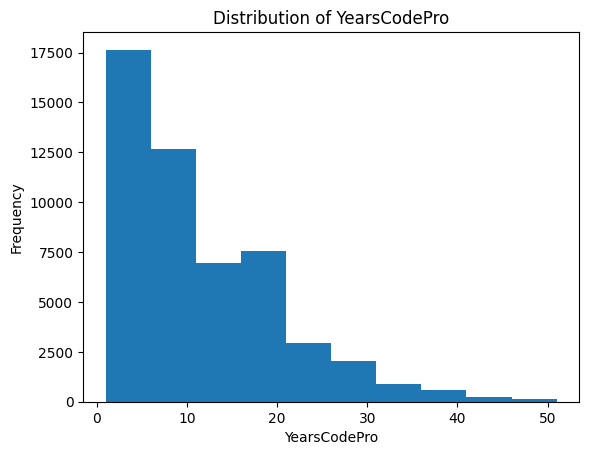

In [17]:
plt.hist(df_hist, bins = 10)
plt.title('Distribution of YearsCodePro')
plt.xlabel('YearsCodePro')
plt.ylabel('Frequency')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [18]:
cols = ['CompTotal', 'Age']
df_hist = df[cols].dropna().reset_index(drop=True)
df_hist = df_hist[df_hist['CompTotal'] < df_hist['CompTotal'].median()] # remove outlier
df_hist = df_hist[df_hist['Age'] != 'Prefer not to say'] # remove invalid age group
df_hist.head()

,CompTotal,Age
1,28000.0,25-34 years old
2,85000.0,35-44 years old
3,50000.0,35-44 years old
6,95000.0,45-54 years old
8,35000.0,35-44 years old


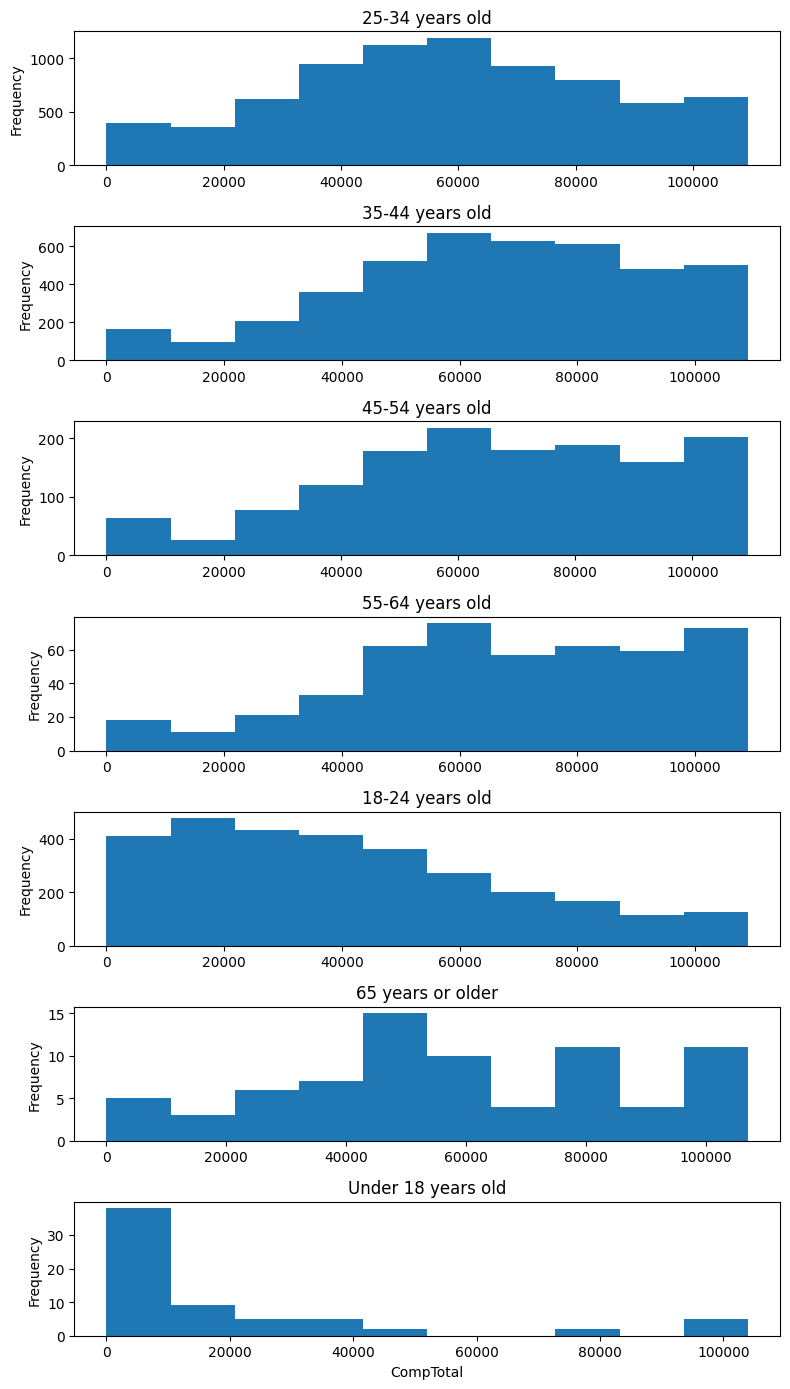

In [19]:
age_groups = df_hist['Age'].unique().tolist()

fig, axes = plt.subplots(len(age_groups), 1, figsize=(8, 14))
for ax, group in zip(axes, age_groups):
    subset = df_hist[df_hist['Age'] == group]
    ax.hist(subset['CompTotal'], bins=10)
    ax.set_title(group)
    ax.set_ylabel('Frequency')

plt.xlabel('CompTotal')
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [20]:
df['TimeSearching_Median'].unique()

array([ nan,  45.,  90.,  22.,   7., 121.])

In [21]:
cols = ['TimeSearching_Median', 'Age']
df_hist = df[cols].dropna().reset_index(drop=True)
df_hist = df_hist[df_hist['Age'] != 'Prefer not to say'] # remove invalid age group
df_hist.head()

,TimeSearching_Median,Age
0,45.0,35-44 years old
1,45.0,35-44 years old
2,90.0,45-54 years old
3,22.0,25-34 years old
4,7.0,25-34 years old


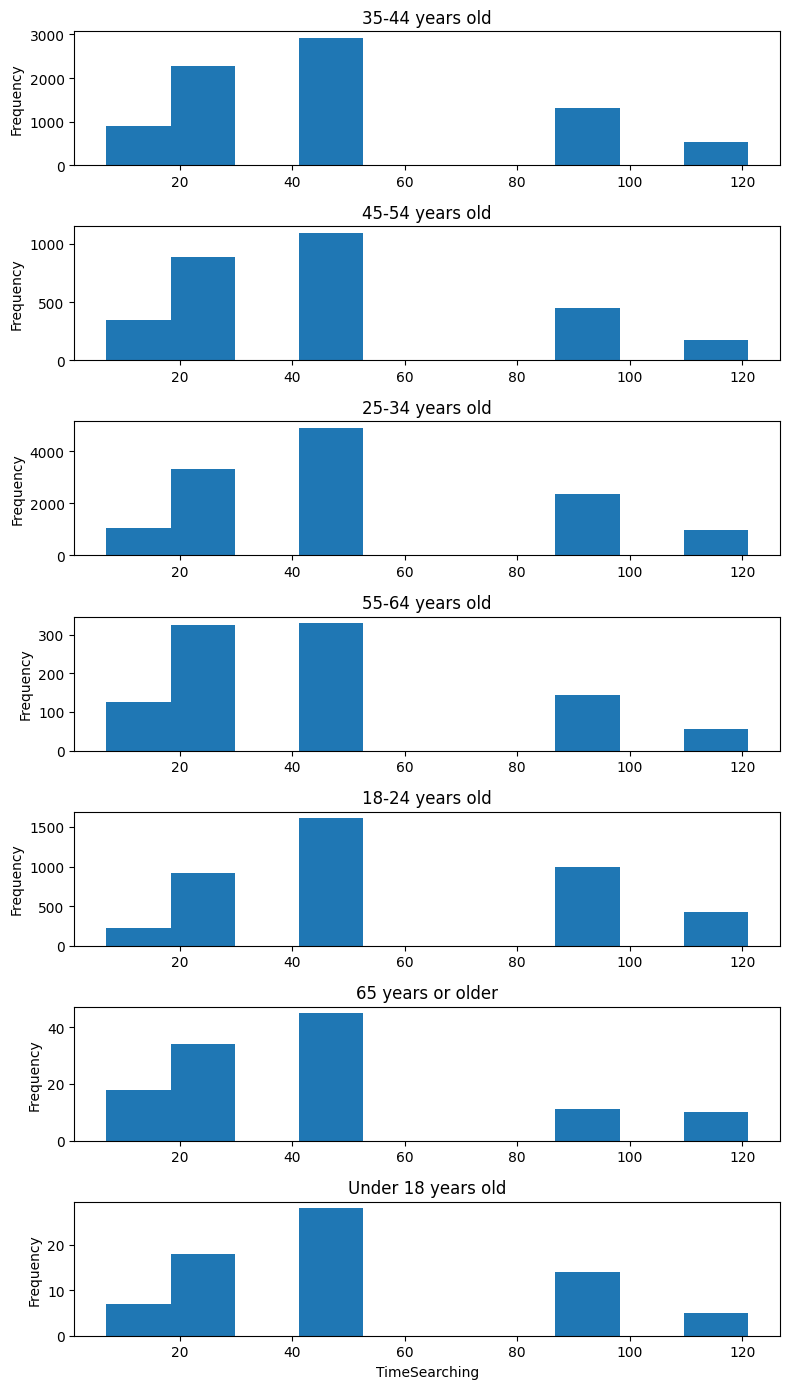

In [22]:
age_groups = df_hist['Age'].unique().tolist()

fig, axes = plt.subplots(len(age_groups), 1, figsize=(8, 14))
for ax, group in zip(axes, age_groups):
    subset = df_hist[df_hist['Age'] == group]
    ax.hist(subset['TimeSearching_Median'], bins=10)
    ax.set_title(group)
    ax.set_ylabel('Frequency')

plt.xlabel('TimeSearching')
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [23]:
top_DB = df['DatabaseWantToWorkWith'].value_counts().head(5).index.tolist()
top_DB

['PostgreSQL', 'PostgreSQL;SQLite', 'SQLite', 'Microsoft SQL Server', 'MySQL']

In [24]:
df_hist = df[df['DatabaseWantToWorkWith'].isin(top_DB)]
df_hist = df_hist[['DatabaseWantToWorkWith']].dropna().reset_index(drop=True)
df_hist.head()

,DatabaseWantToWorkWith
0,PostgreSQL
1,PostgreSQL;SQLite
2,MySQL
3,Microsoft SQL Server
4,Microsoft SQL Server


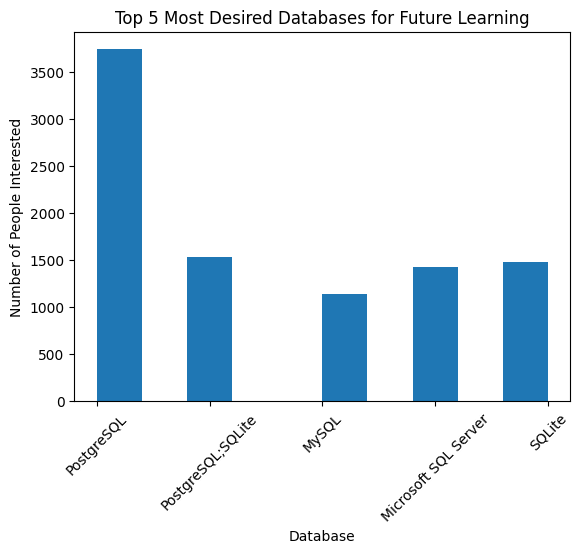

In [25]:
plt.hist(df_hist)
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of People Interested')
plt.xticks(rotation=45)
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [26]:
df['RemoteWork'].unique()

array(['Remote', None, 'In-person',
       'Hybrid (some remote, some in-person)'], dtype=object)

In [27]:
df['RemoteWork'] = df['RemoteWork'].replace({'Hybrid (some remote, some in-person)':'Hybrid'})
df['RemoteWork'].unique()

array(['Remote', None, 'In-person', 'Hybrid'], dtype=object)

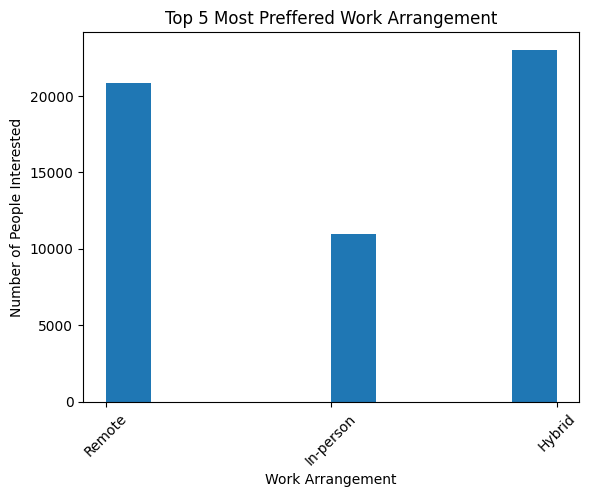

In [28]:
top_DB = df['RemoteWork'].value_counts().head(5).index.tolist()
df_hist = df[df['RemoteWork'].isin(top_DB)]
df_hist = df_hist[['RemoteWork']].dropna().reset_index(drop=True)

plt.hist(df_hist)
plt.title('Top 5 Most Preffered Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of People Interested')
plt.xticks(rotation=45)
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [29]:
df['Age_Median'].unique()

array([10., 40., 50., 20., 30., 60., nan, 70.])

In [30]:
cols = ['Age_Median', 'CompTotal']
df_hist = df[(df['Age_Median'] >= 45) & (df['Age_Median'] <= 60)] # filter age group
df_hist = df_hist[cols].dropna()
# group for median line plot
df_hist = df_hist.groupby('Age_Median')['CompTotal'].median().reset_index()
df_hist

,Age_Median,CompTotal
0,50.0,130000.0
1,60.0,135000.0


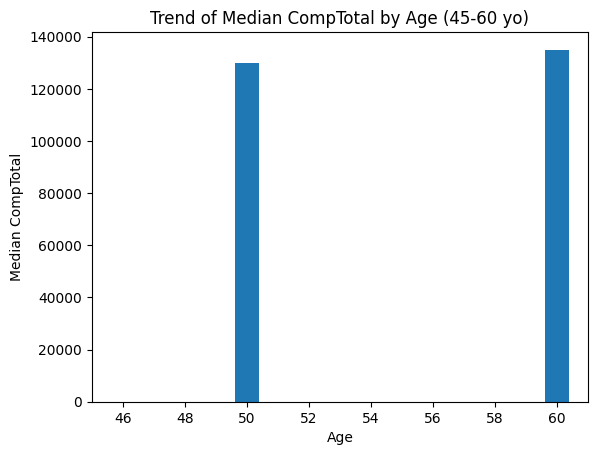

In [31]:
plt.bar(df_hist['Age_Median'], df_hist['CompTotal'])
plt.title('Trend of Median CompTotal by Age (45-60 yo)')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.xlim(45, 61)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [32]:
df['JobSat'].unique()

array([nan,  8.,  5., 10.,  6.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

In [33]:
df['YearsCodePro_Level'].unique()

array([nan, 'Senior (11-20)', 'Veteran (21+)', 'Mid (6-10)',
       'Junior (3-5)', 'Beginner (0-2)'], dtype=object)

In [34]:
cols = ['JobSat', 'YearsCodePro_Level']
df_hist = df[cols].dropna().reset_index(drop=True)
df_hist.head()

,JobSat,YearsCodePro_Level
0,8.0,Senior (11-20)
1,5.0,Veteran (21+)
2,10.0,Mid (6-10)
3,6.0,Senior (11-20)
4,9.0,Senior (11-20)


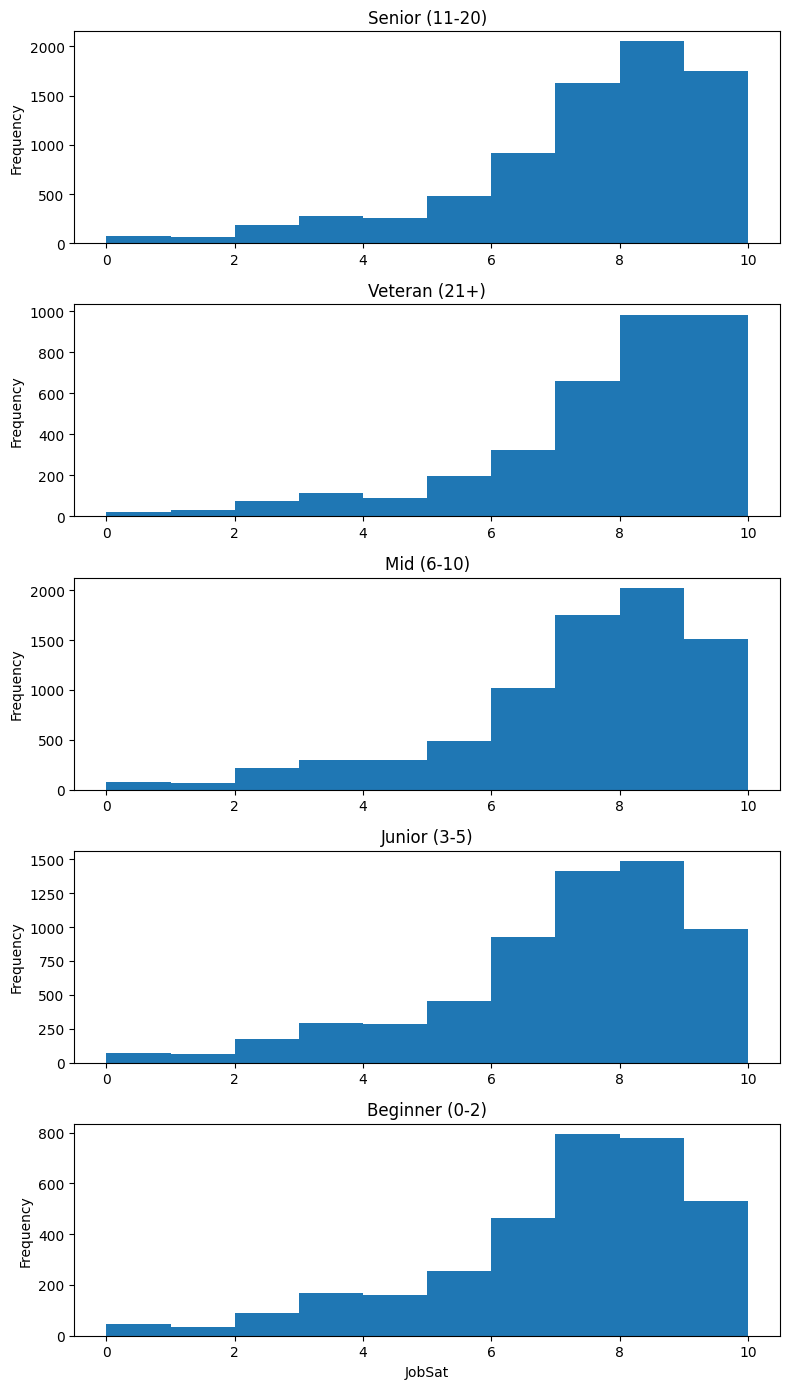

In [35]:
exp_groups = df_hist['YearsCodePro_Level'].unique().tolist()

fig, axes = plt.subplots(len(exp_groups), 1, figsize=(8, 14))
for ax, group in zip(axes, exp_groups):
    subset = df_hist[df_hist['YearsCodePro_Level'] == group]
    ax.hist(subset['JobSat'], bins=10)
    ax.set_title(group)
    ax.set_ylabel('Frequency')

plt.xlabel('JobSat')
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [36]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
